In [1]:
# Dans votre Jupyter notebook

import os
import torch
import torchaudio
from metrics import load_audio, compute_metrics, plot_spectrograms,  plot_af_pairs ,plot_energy_distribution
from gest_segm import parse_rttm_file, get_segments_from_directory, plot_segments, filter_segments_before_n_seconds




In [2]:


# Charger et traiter les fichiers audio pour chaque micro
waveforms = []
sample_rate = None
for mic_num in range(1, 9):
    SAMPLE_WAV = f"amicorpus/ES2002c/audio/ES2002c.Array1-0{mic_num}.wav"
    print(f"Processing {SAMPLE_WAV}")

    # Charger le fichier audio
    waveform, sample_rate = load_audio(SAMPLE_WAV)
    waveforms.append(waveform)

# Calculer les métriques
specs, lps, phases, ipd_pairs, af_pairs  = compute_metrics(waveforms, sample_rate)



Processing amicorpus/ES2002c/audio/ES2002c.Array1-01.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-01.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-02.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-02.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-03.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-03.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-04.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-04.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-05.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-05.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-06.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-06.wav 

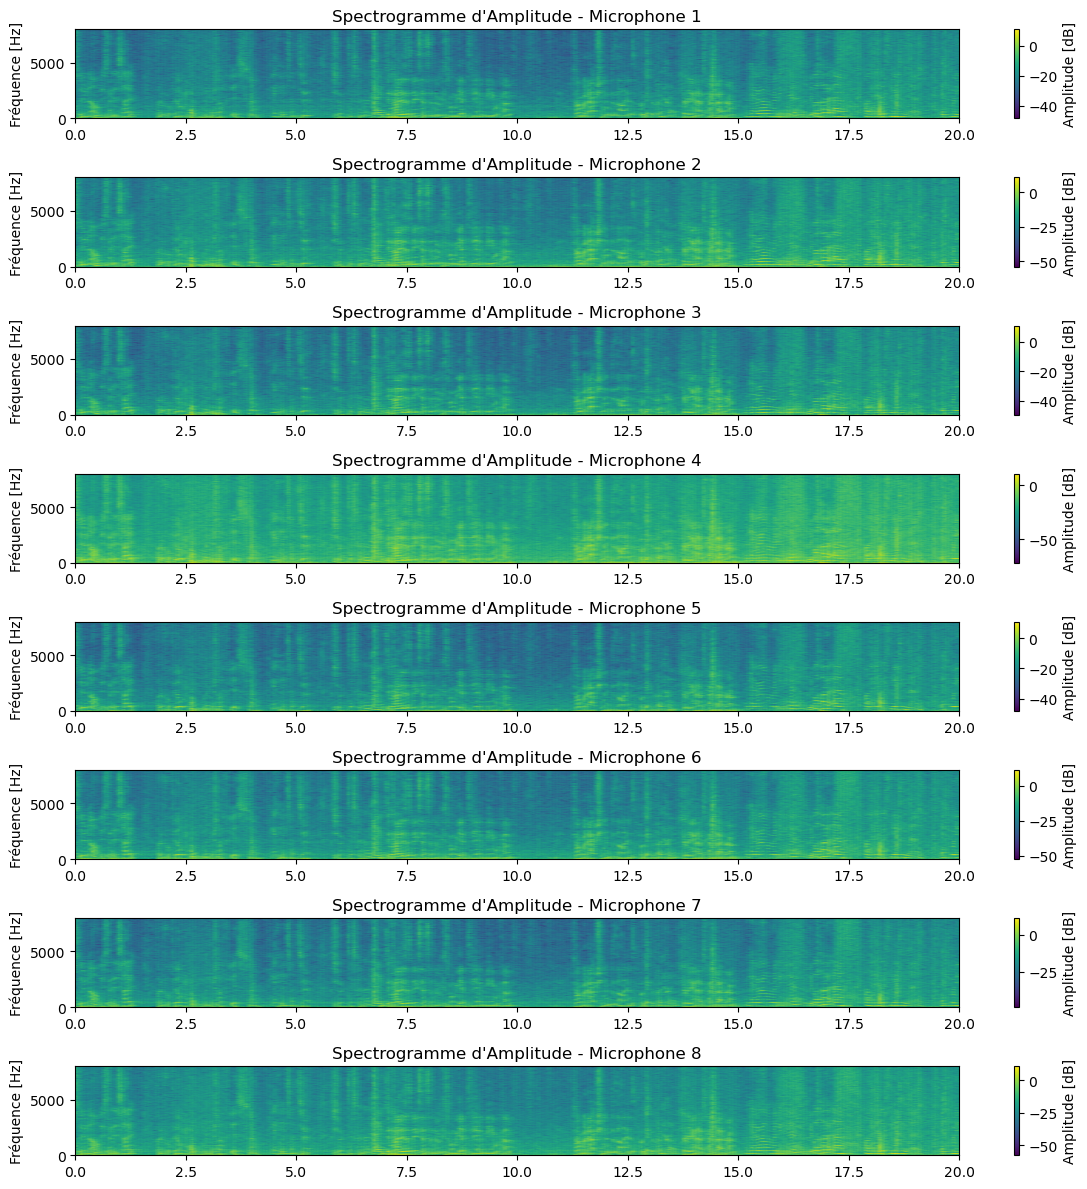

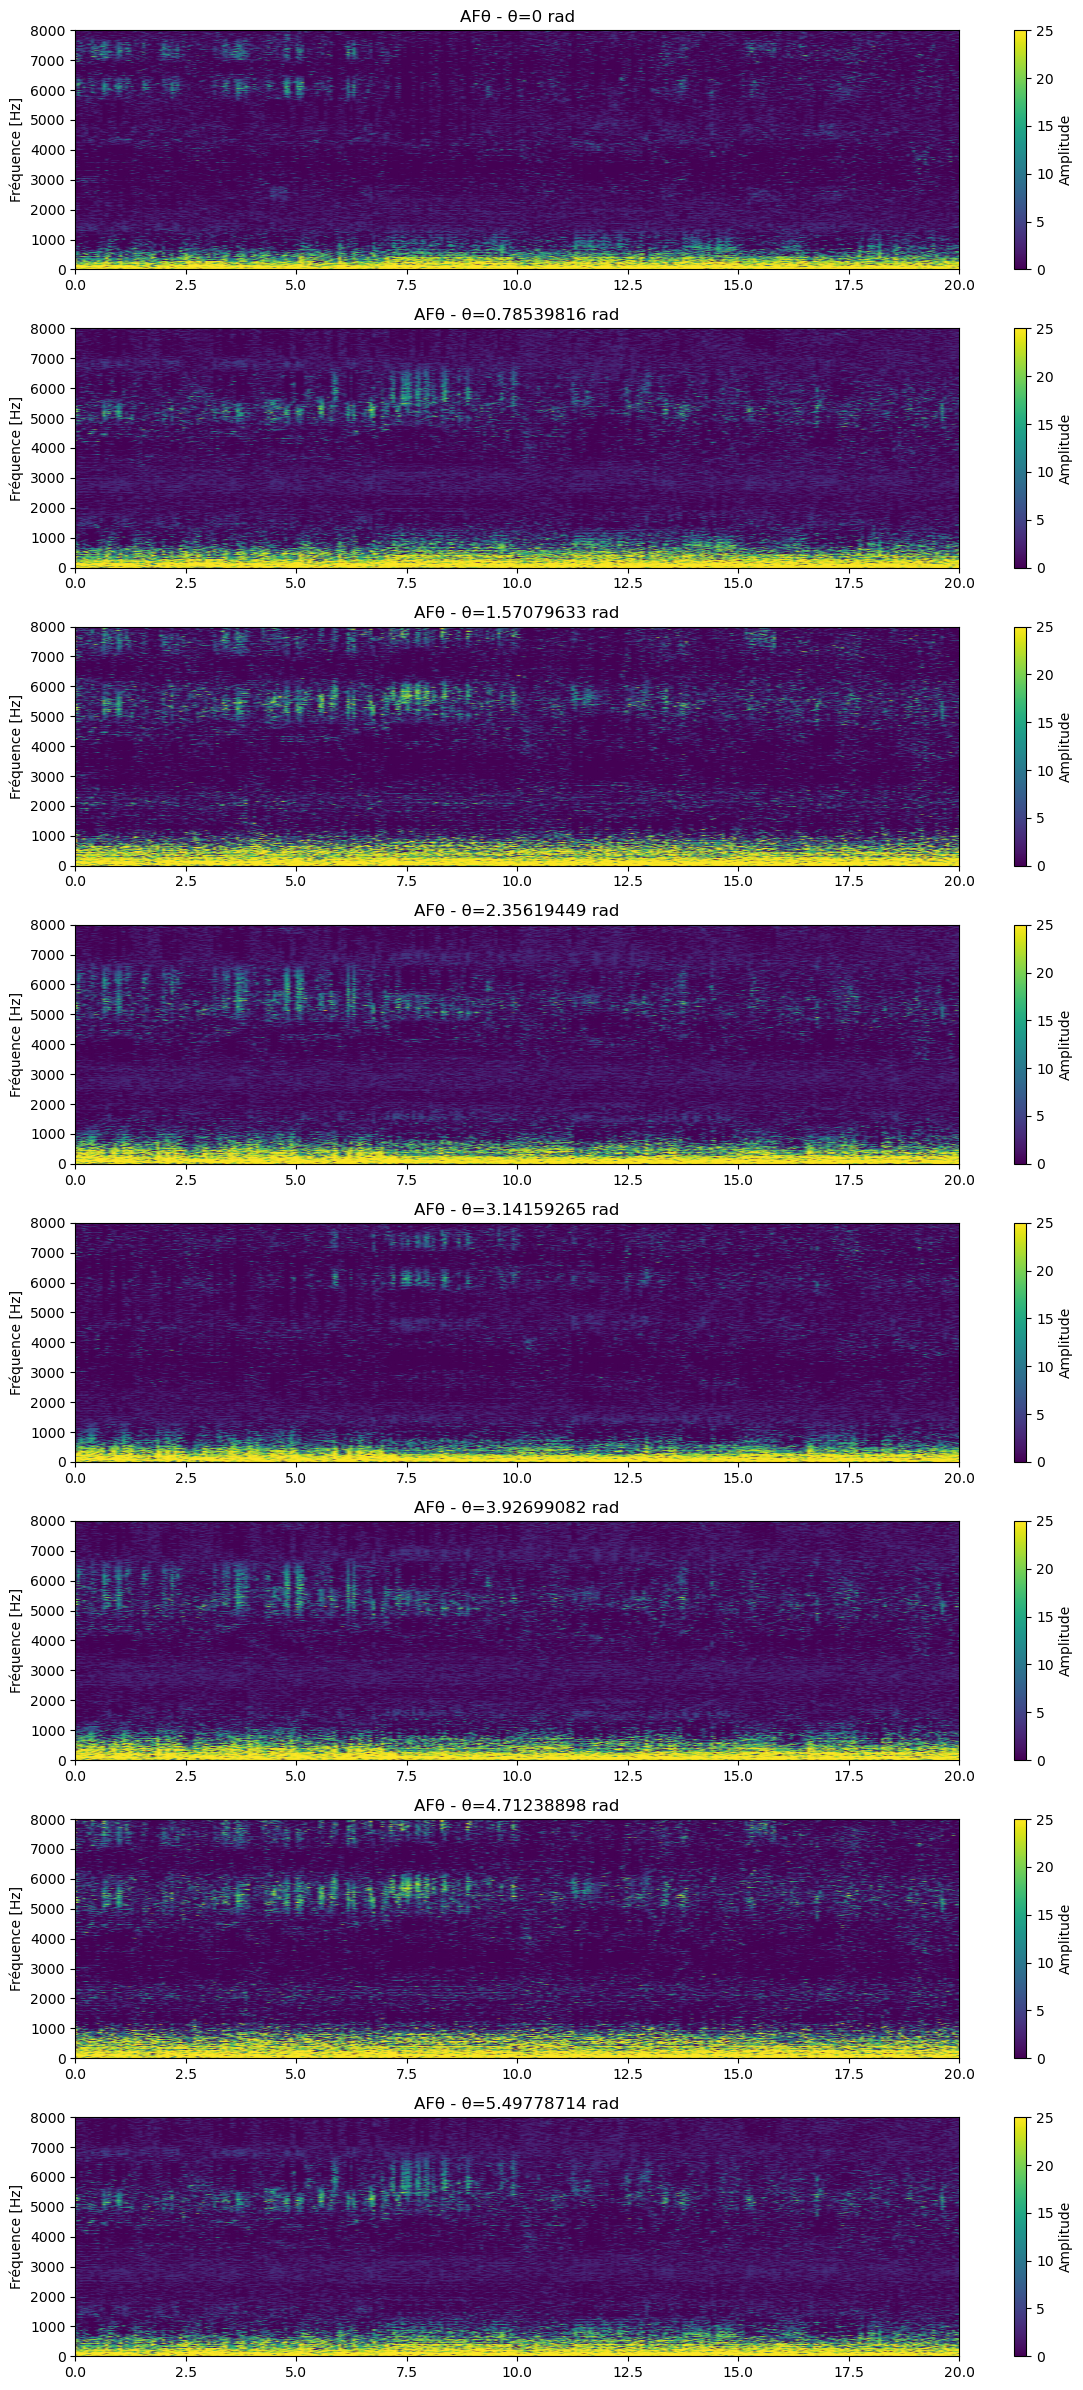

In [3]:
duration = 20

# Plot the metrics
plot_spectrograms(lps, sample_rate, duration)

plot_af_pairs(af_pairs, sample_rate, duration)
# Replace the existing plot_energy_distribution call with these two


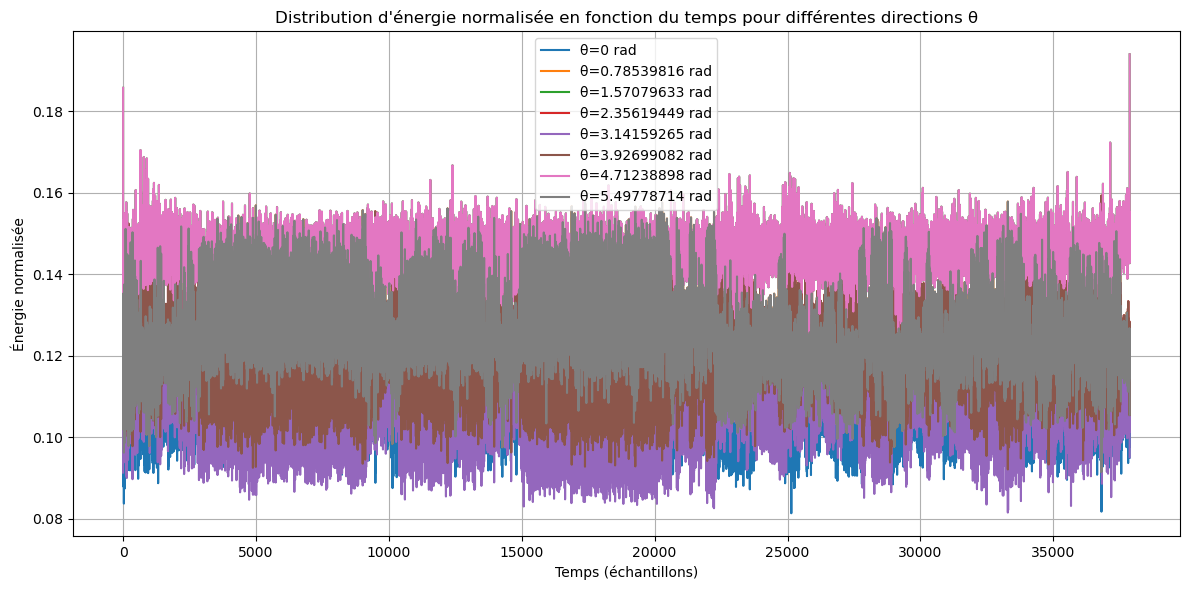

In [4]:

# Définir le répertoire contenant les fichiers RTTM
rttm_directory = 'annot_prepare/results/rttm'

# Obtenir tous les segments du répertoire
segments = get_segments_from_directory(rttm_directory)


# Filtrer et tracer les segments qui se produisent avant n secondes
n_seconds = 20  # spécifiez le nombre de secondes
filtered_segments = filter_segments_before_n_seconds(segments, n_seconds)
plot_energy_distribution(af_pairs)
plot_segments(filtered_segments, title=f"Speaker Segments Before {n_seconds} Seconds")